# Sony Products

# Aim of the Projects
- Aim of the Project
To analyze the product dataset and build machine learning models that can predict the product rating category (Good / Average / Poor) based on features such as Price, MRP, Discount, and Discount Amount.
The aim is to compare multiple supervised learning models and identify the model that provides the best prediction accuracy for improving product evaluation and decision-making.

In [167]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [168]:
df=pd.read_csv("flipkart_electronics.csv")
df

,Product_name,Price,Rating,MRP,Discount
0,SONY BRAVIA 2 II 138.8 cm (55 inch) Ultra HD (...,"₹55,990",4.7,"₹91,900",39% off
1,SONY Bravia 2 138.8 cm (55 inch) Ultra HD (4K)...,"₹51,490",4.7,"₹91,900",43% off
2,SONY ULT WEAR Noise Cancelling with Massive Ba...,"₹14,990",4.5,"₹24,990",40% off
3,"SONY New WF-C510 TWS Light Weight, Compact In-...","₹4,990",4.1,"₹8,990",44% off
4,"SONY WH-CH720N Active Noise Cancelling, 50 Hrs...","₹8,890",4.4,"₹14,990",40% off
...,...,...,...,...,...
845,IZWI Buds Wireless 3 with MAGNETIC POWER OFF/O...,₹522,NaN,"₹2,499",79% off
846,Bxeno Buds Wireless 5 Lite MAGNETIC POWER OFF/...,₹480,NaN,"₹3,850",87% off
847,DigiClues BT-Prime Neckband Upto 150 hrs Playt...,₹660,NaN,"₹5,999",88% off
848,CIHYARD C-110 Pro Bass Wireless Neckband with ...,₹299,NaN,"₹2,499",88% off


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_name  850 non-null    object 
 1   Price         848 non-null    object 
 2   Rating        367 non-null    float64
 3   MRP           837 non-null    object 
 4   Discount      836 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.3+ KB


In [170]:
# Step 2: Remove ₹ and commas from Price & MRP and convert to numeric
df['Price'] = df['Price'].replace('[₹,]', '', regex=True).astype(float)
df['MRP'] = df['MRP'].replace('[₹,]', '', regex=True).astype(float)

# Step 3: Clean Discount column — remove “% off” and convert to numeric
df['Discount'] = df['Discount'].replace('[% off]', '', regex=True).astype(float)

In [171]:
df.isnull().sum()

Product_name      0
Price             2
Rating          483
MRP              13
Discount         14
dtype: int64

In [172]:
# Handle Missing Values
# Fill missing ratings with mean or median
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

# Fill missing MRP or Price with median
df['MRP'] = df['MRP'].fillna(df['MRP'].median())
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Discount'].fillna(df['Discount'].median(), inplace=True)

In [173]:
df.isnull().sum()

Product_name    0
Price           0
Rating          0
MRP             0
Discount        0
dtype: int64

In [174]:
df.drop_duplicates(inplace=True)

In [175]:
# Step 6: Optional – Create a new column for Discount amount
df['Discount_Amount'] = df['MRP'] - df['Price']

In [176]:
# Step 7: Fix text formatting in Product Name
df['Product_name'] = df['Product_name'].str.strip().str.title()

In [177]:
df

,Product_name,Price,Rating,MRP,Discount,Discount_Amount
0,Sony Bravia 2 Ii 138.8 Cm (55 Inch) Ultra Hd (...,55990.0,4.700000,91900.0,39.0,35910.0
1,Sony Bravia 2 138.8 Cm (55 Inch) Ultra Hd (4K)...,51490.0,4.700000,91900.0,43.0,40410.0
2,Sony Ult Wear Noise Cancelling With Massive Ba...,14990.0,4.500000,24990.0,40.0,10000.0
3,"Sony New Wf-C510 Tws Light Weight, Compact In-...",4990.0,4.100000,8990.0,44.0,4000.0
4,"Sony Wh-Ch720N Active Noise Cancelling, 50 Hrs...",8890.0,4.400000,14990.0,40.0,6100.0
...,...,...,...,...,...,...
845,Izwi Buds Wireless 3 With Magnetic Power Off/O...,522.0,4.104632,2499.0,79.0,1977.0
846,Bxeno Buds Wireless 5 Lite Magnetic Power Off/...,480.0,4.104632,3850.0,87.0,3370.0
847,Digiclues Bt-Prime Neckband Upto 150 Hrs Playt...,660.0,4.104632,5999.0,88.0,5339.0
848,Cihyard C-110 Pro Bass Wireless Neckband With ...,299.0,4.104632,2499.0,88.0,2200.0


In [178]:
df.describe()

,Price,Rating,MRP,Discount,Discount_Amount
count,850.000000,850.000000,850.000000,850.000000,850.000000
mean,25542.002353,4.104632,36715.917647,60.889412,11173.915294
std,64466.226684,0.406951,90219.202307,26.825475,30663.932419
min,160.000000,1.000000,499.000000,1.000000,-63551.000000
25%,498.000000,4.104632,2899.000000,36.000000,2009.750000
50%,728.000000,4.104632,4349.000000,73.000000,3799.000000
75%,10844.250000,4.104632,14742.250000,84.000000,6618.750000
max,550990.000000,5.000000,899900.000000,90.000000,392754.000000


In [179]:
df.head()

,Product_name,Price,Rating,MRP,Discount,Discount_Amount
0,Sony Bravia 2 Ii 138.8 Cm (55 Inch) Ultra Hd (...,55990.0,4.7,91900.0,39.0,35910.0
1,Sony Bravia 2 138.8 Cm (55 Inch) Ultra Hd (4K)...,51490.0,4.7,91900.0,43.0,40410.0
2,Sony Ult Wear Noise Cancelling With Massive Ba...,14990.0,4.5,24990.0,40.0,10000.0
3,"Sony New Wf-C510 Tws Light Weight, Compact In-...",4990.0,4.1,8990.0,44.0,4000.0
4,"Sony Wh-Ch720N Active Noise Cancelling, 50 Hrs...",8890.0,4.4,14990.0,40.0,6100.0


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_name     850 non-null    object 
 1   Price            850 non-null    float64
 2   Rating           850 non-null    float64
 3   MRP              850 non-null    float64
 4   Discount         850 non-null    float64
 5   Discount_Amount  850 non-null    float64
dtypes: float64(5), object(1)
memory usage: 40.0+ KB


In [222]:
df.to_csv("Cleaned_SonyProducts.csv", index=False)
print(" Data saved as 'flipkart_electronics.csv'")

 Data saved as 'flipkart_electronics.csv'


In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

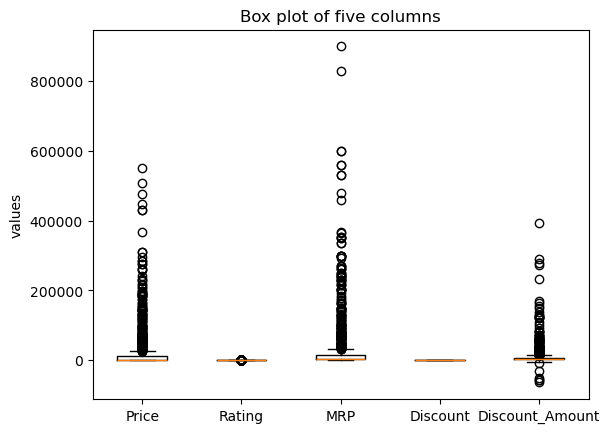

In [183]:
plt.boxplot(df[['Price','Rating','MRP','Discount','Discount_Amount']])
plt.xticks([1,2,3,4,5],['Price','Rating','MRP','Discount','Discount_Amount'])
plt.ylabel('values')
plt.title('Box plot of five columns')
plt.show()

# EDA

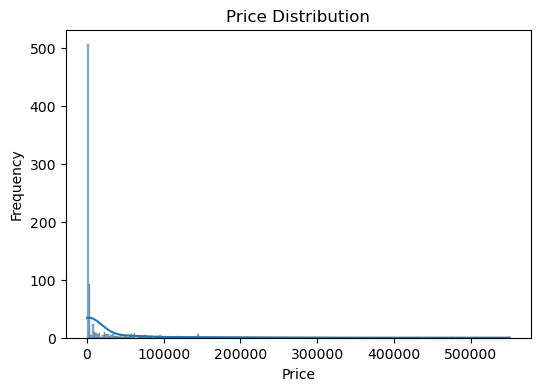

In [223]:
# 🔹 UNIVARIATE ANALYSIS

# Price Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Insights
- Most products are priced at the lower end (close to 0–5000 range).

- Very few products have high prices, which creates a long right tail in the distribution.

- The distribution is right-skewed, meaning high-priced items are rare.

- This indicates that the majority of products are budget or mid-range, while only few are premium / expensive models.

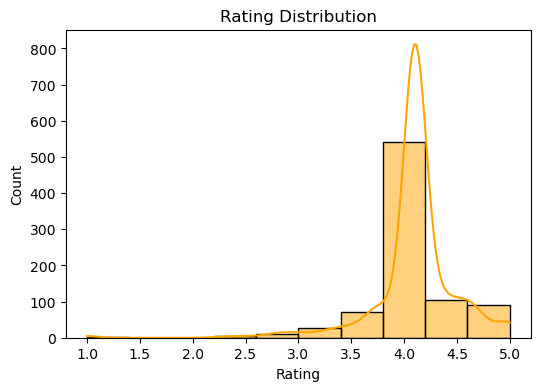

In [224]:
# Rating Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=10, kde=True, color='orange')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Insights
- Most products have ratings between 3.5 and 4.5.

- The distribution is centered around 4.0, meaning many products are well-rated.

- Very few products have low ratings (below 3.0).

- Overall, customers seem to be satisfied with most products in this dataset.

- The distribution shape suggests good product quality on average.

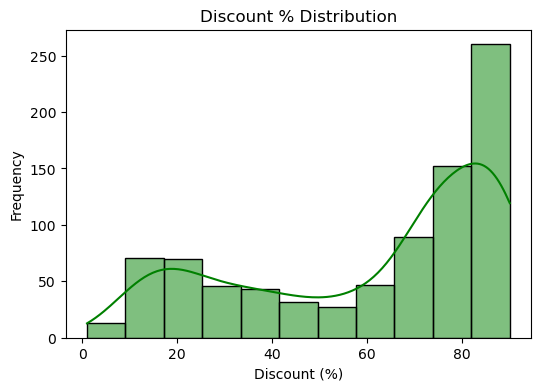

In [225]:
# Discount Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Discount'], kde=True, color='green')
plt.title('Discount % Distribution')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.show()

# Insights

- Products have a wide range of discounts, from very low (0-10%) to very high (80-90%).

- The most common discounts are in the 70% to 90% range, indicating heavy discounting on many products.

- Only few products have moderate discounts (30% to 50% range).

- Very small number of products have very low discounts (below 10%).

- This suggests that high discount offers are very common, likely used to attract customers and boost sales.

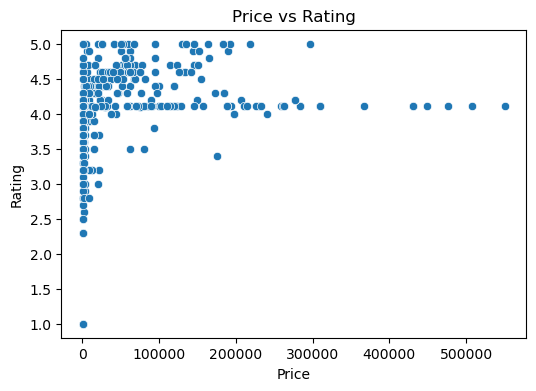

In [226]:
# 🔹 BIVARIATE ANALYSIS

# Price vs Rating
plt.figure(figsize=(6,4))
sns.scatterplot(x='Price', y='Rating', data=df)
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Insights
- Most items are priced below 100,000, showing a concentration of affordable products.

- Ratings are generally high (around 4–5) for the majority of items.

- A few expensive items (over 200,000) also have good ratings (~4–5).

- There’s no strong correlation between price and rating — higher prices don’t necessarily mean better ratings.

- One or two outliers exist with very low ratings (~1–2), but they are few.

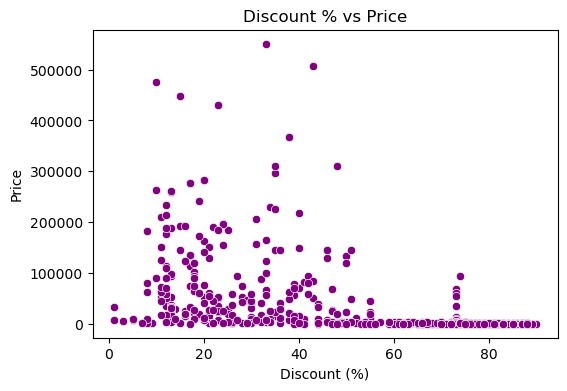

In [227]:
# Discount vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='Discount', y='Price', data=df, color='purple')
plt.title('Discount % vs Price')
plt.xlabel('Discount (%)')
plt.ylabel('Price')
plt.show()

# Insights
- Most products have discounts below 40%.

- A large number of items are priced under 100,000, even with varying discounts.

- A few high-priced items (above 300,000) exist, but they usually have moderate discounts (10–40%).

- Very high discounts (above 70%) are rare and mostly seen on low-priced items.

- There’s no clear trend showing that higher discounts lead to higher or lower prices.

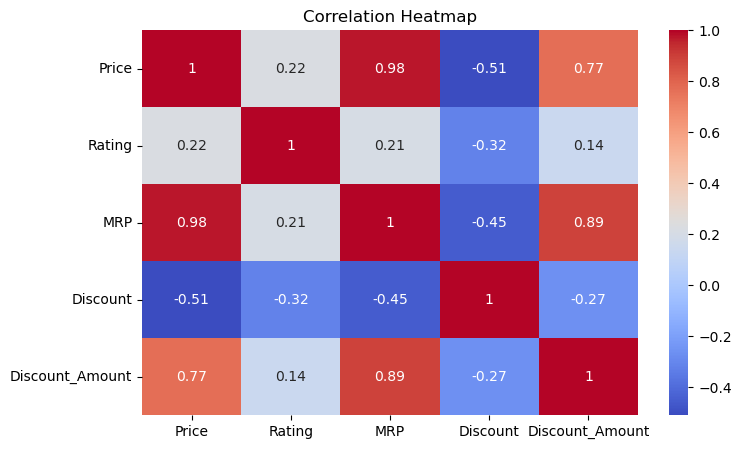

In [229]:
# 🔹 MULTIVARIATE ANALYSIS

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df[['Price', 'Rating', 'MRP', 'Discount', 'Discount_Amount']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Insights 
- Price and MRP have a very strong positive correlation (0.98) — higher MRP usually means higher price.

- Discount is negatively correlated with Price (-0.51) and MRP (-0.45) — higher discounts tend to lower prices.

- Discount Amount has a strong positive correlation with both MRP (0.89) and Price (0.77) — costlier items tend to have larger discount amounts.

- Rating shows weak correlations with all other variables, meaning product rating isn’t strongly affected by price or discounts.

- Overall, price and MRP move closely together, while discounts tend to pull them down.

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [192]:
features = ['Price', 'Rating', 'MRP', 'Discount', 'Discount_Amount']
X = df[features].copy()

In [193]:
X = X.fillna(X.median())

In [194]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

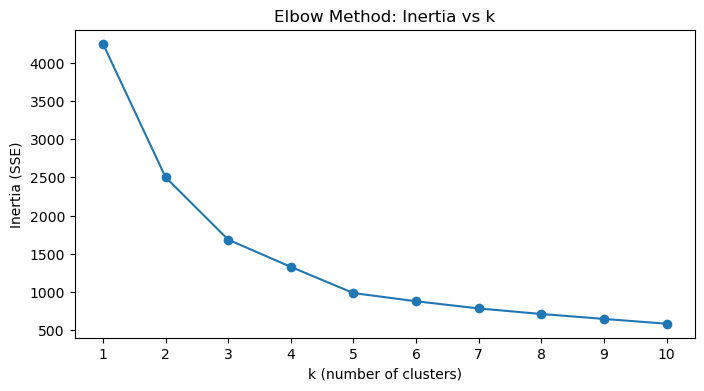

In [195]:
# 3) Elbow method (inertia) to inspect SSE vs k
inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, '-o')
plt.xticks(K_range)
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method: Inertia vs k')
plt.show()

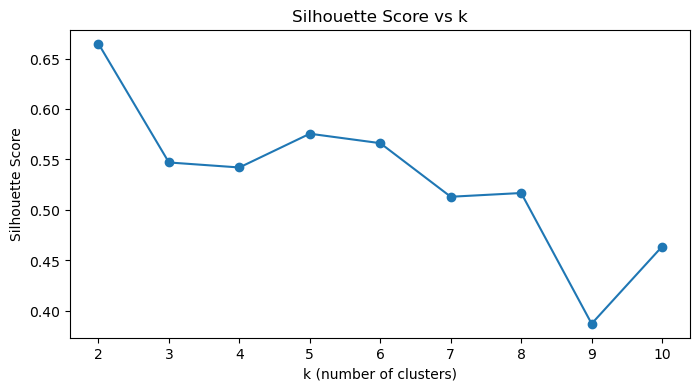

In [196]:
# 4) Silhouette scores for k = 2..10 (helps select best k)
sil_scores = []
K_range2 = range(2, 11)
for k in K_range2:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(8,4))
plt.plot(list(K_range2), sil_scores, '-o')
plt.xticks(list(K_range2))
plt.xlabel('k (number of clusters)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

In [197]:
# Pick best k by silhouette (argmax)
best_k = K_range2[np.argmax(sil_scores)]
print(f"Best k by silhouette score: {best_k}")

Best k by silhouette score: 2


In [198]:
# 5) Train final KMeans with best_k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50)
cluster_labels = kmeans.fit_predict(X_scaled)

In [199]:
df['cluster'] = cluster_labels

In [200]:
# Cluster centers in original scale (inverse transform)
centers_scaled = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centers_scaled)
centers_df = pd.DataFrame(centers_original, columns=features)
centers_df.index.name = 'cluster'
print("Cluster centers (original scale):")
print(centers_df)

Cluster centers (original scale):
                 Price    Rating            MRP   Discount  Discount_Amount
cluster                                                                    
0          9259.195122  4.079593   14076.944801  64.046213      4817.749679
1        204194.211268  4.379357  285106.901408  26.253521     80912.690141


In [201]:
# Count of rows per cluster
print("\nCluster counts:")
print(df['cluster'].value_counts().sort_index())


Cluster counts:
cluster
0    779
1     71
Name: count, dtype: int64


Text(0, 0.5, 'PC2')

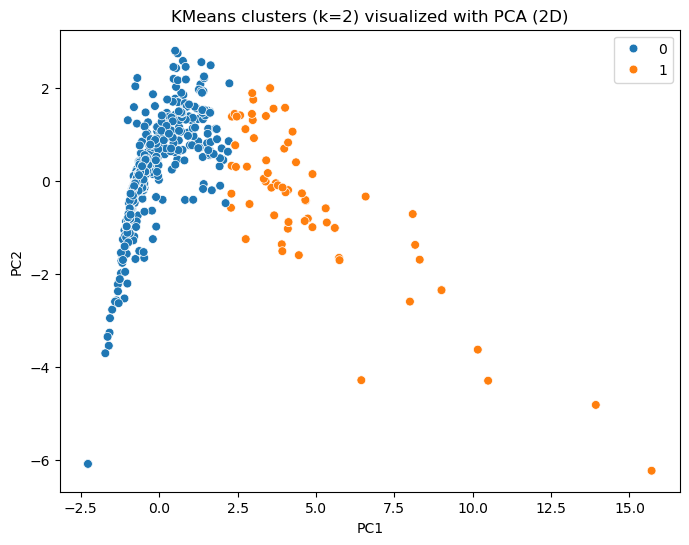

In [202]:
# 6) Visualize clusters in 2D using PCA (for interpretation)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
palette = sns.color_palette("tab10", n_colors=best_k)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette=palette, legend='full', s=40)
plt.title(f'KMeans clusters (k={best_k}) visualized with PCA (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [203]:
# 7) Check sample rows from each cluster (top 3 examples)
for c in sorted(df['cluster'].unique()):
    print(f"\nCluster {c} — sample products (top 3):")
    display(df[df['cluster'] == c].head(3)[['Product_name'] + features + ['cluster']])


Cluster 0 — sample products (top 3):


,Product_name,Price,Rating,MRP,Discount,Discount_Amount,cluster
0,Sony Bravia 2 Ii 138.8 Cm (55 Inch) Ultra Hd (...,55990.0,4.7,91900.0,39.0,35910.0,0
1,Sony Bravia 2 138.8 Cm (55 Inch) Ultra Hd (4K)...,51490.0,4.7,91900.0,43.0,40410.0,0
2,Sony Ult Wear Noise Cancelling With Massive Ba...,14990.0,4.5,24990.0,40.0,10000.0,0



Cluster 1 — sample products (top 3):


,Product_name,Price,Rating,MRP,Discount,Discount_Amount,cluster
63,Sony Bravia 3 189.3 Cm (75 Inch) Ultra Hd (4K)...,132491.0,4.6,269990.0,50.0,137499.0,1
69,Sony Bravia 8 Ii 138.8 Cm (55 Inch) Oled Ultra...,217990.0,5.0,367900.0,40.0,149910.0,1
76,Sony Alpha Ilce-7M3K Full Frame Mirrorless Cam...,133490.0,4.6,161490.0,17.0,28000.0,1


In [204]:
# 8) How to predict cluster for a new product
# Example new product (replace values with real product values)
new_product = {
    'Price': 500000.0,
    'Rating': 4.2,
    'MRP': 49990.0,
    'Discount': 50.0,
    'Discount_Amount': 2499.0
}
new_df = pd.DataFrame([new_product])
new_scaled = scaler.transform(new_df[features])
predicted_cluster = kmeans.predict(new_scaled)[0]
print(f"\nNew product belongs to cluster: {predicted_cluster}")


New product belongs to cluster: 1


In [205]:
# 9) Save scaler and kmeans model for later use
joblib.dump(scaler, 'kmeans_scaler.joblib')
joblib.dump(kmeans, 'kmeans_model.joblib')
print("\nSaved scaler -> kmeans_scaler.joblib and model -> kmeans_model.joblib")


Saved scaler -> kmeans_scaler.joblib and model -> kmeans_model.joblib


In [206]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [207]:
# ----- Step 1: Create Target Column -----
df['Rating_Category'] = df['Rating'].apply(
    lambda x: 'Good' if x >= 4.0 else ('Average' if x >= 3.0 else 'Poor')
)

In [208]:
# ----- Step 2: Select Features & Target -----
features = ['Price', 'MRP', 'Discount', 'Discount_Amount']
X = df[features]
y = df['Rating_Category']

In [209]:
# ----- Step 3: Encode Target -----
le = LabelEncoder()
y = le.fit_transform(y)

In [210]:
# ----- Step 4: Train Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
# ----- Step 5: Scale Features -----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [212]:
# ----- Model 1: Logistic Regression -----
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


--- Logistic Regression ---
Accuracy: 0.8411764705882353
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.84      1.00      0.91       143
           2       0.00      0.00      0.00         4

    accuracy                           0.84       170
   macro avg       0.28      0.33      0.30       170
weighted avg       0.71      0.84      0.77       170



In [213]:
# ----- Model 2: Support Vector Machine -----
svm = SVC()
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)
print("\n--- Support Vector Machine (SVM) ---")
print("Accuracy:", accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm))


--- Support Vector Machine (SVM) ---
Accuracy: 0.8411764705882353
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.84      1.00      0.91       143
           2       0.00      0.00      0.00         4

    accuracy                           0.84       170
   macro avg       0.28      0.33      0.30       170
weighted avg       0.71      0.84      0.77       170



In [214]:
# ----- Model 3: K-Nearest Neighbors -----
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print("\n--- KNN ---")
print("Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))


--- KNN ---
Accuracy: 0.8294117647058824
              precision    recall  f1-score   support

           0       0.44      0.30      0.36        23
           1       0.87      0.94      0.90       143
           2       0.00      0.00      0.00         4

    accuracy                           0.83       170
   macro avg       0.44      0.41      0.42       170
weighted avg       0.79      0.83      0.81       170



In [215]:
# ----- Model 4: Random Forest -----
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


--- Random Forest ---
Accuracy: 0.8294117647058824
              precision    recall  f1-score   support

           0       0.41      0.30      0.35        23
           1       0.88      0.93      0.90       143
           2       0.50      0.25      0.33         4

    accuracy                           0.83       170
   macro avg       0.60      0.49      0.53       170
weighted avg       0.81      0.83      0.82       170



In [216]:
# ----- Model 5: XGBoost -----
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)
print("\n--- XGBoost ---")
print("Accuracy:", accuracy_score(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))


--- XGBoost ---
Accuracy: 0.8235294117647058
              precision    recall  f1-score   support

           0       0.38      0.35      0.36        23
           1       0.89      0.92      0.90       143
           2       0.00      0.00      0.00         4

    accuracy                           0.82       170
   macro avg       0.42      0.42      0.42       170
weighted avg       0.80      0.82      0.81       170



In [217]:
# ----- Model Comparison -----

# Store accuracies
model_names = ['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, pred_lr),
    accuracy_score(y_test, pred_svm),
    accuracy_score(y_test, pred_knn),
    accuracy_score(y_test, pred_rf),
    accuracy_score(y_test, pred_xgb)
]

In [218]:
# Print Accuracy Comparison Table
comparison_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
print("\n\n=== Model Accuracy Comparison ===")
print(comparison_df)



=== Model Accuracy Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.841176
1                  SVM  0.841176
2                  KNN  0.829412
3        Random Forest  0.829412
4              XGBoost  0.823529


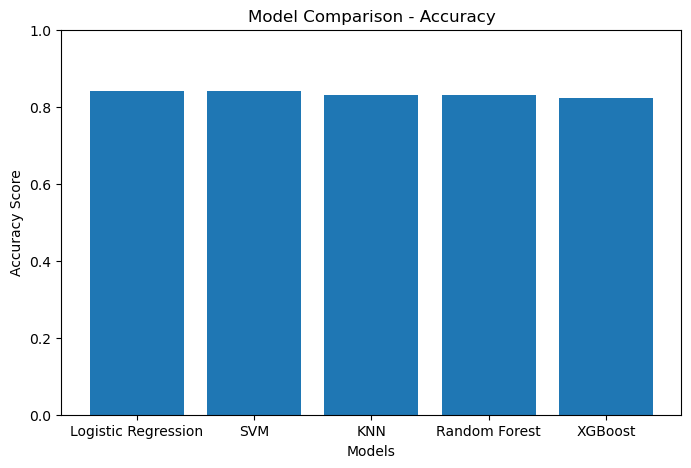

In [219]:
# ----- Accuracy Bar Chart -----
plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)  # accuracy range
plt.show()

In [220]:
from sklearn.model_selection import GridSearchCV

# ----- Logistic Regression Hyperparameter Tuning -----

# Parameter grid to try
param_grid = {
    'penalty': ['l1', 'l2'],         # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],    # Strength of regularization
    'solver': ['liblinear']          # solver that supports L1 & L2
}

log_reg = LogisticRegression()

grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best model from tuning
best_lr = grid.best_estimator_

# Predictions
pred_lr = best_lr.predict(X_test)

print("\n--- Logistic Regression (Tuned) ---")
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(classification_report(y_test, pred_lr))



--- Logistic Regression (Tuned) ---
Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8411764705882353
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.84      1.00      0.91       143
           2       0.00      0.00      0.00         4

    accuracy                           0.84       170
   macro avg       0.28      0.33      0.30       170
weighted avg       0.71      0.84      0.77       170



In [221]:
# --- Predict new product rating category using user input ---

# Ask user for input values
price = float(input("Enter Product Price: "))
mrp = float(input("Enter Product MRP: "))
discount = float(input("Enter Product Discount (%): "))
discount_amount = float(input("Enter Discount Amount: "))

# Put values into a DataFrame format
new_data = pd.DataFrame([[price, mrp, discount, discount_amount]], 
                        columns=['Price', 'MRP', 'Discount', 'Discount_Amount'])

# Scale input using the SAME scaler used during training
new_data_scaled = scaler.transform(new_data)

# Predict using the tuned logistic regression model
pred = best_lr.predict(new_data_scaled)

# Convert back from encoded label to original category
pred_label = le.inverse_transform(pred)

print("\nPredicted Rating Category:", pred_label[0])

Enter Product Price:  8490
Enter Product MRP:  12990
Enter Product Discount (%):  34
Enter Discount Amount:  4500



Predicted Rating Category: Good


In [ ]:
import joblib
# Save the tuned model
joblib.dump(best_lr, "logistic_model.joblib")